In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
## Load dataset
data_path = data_dir + "/gmm/gmm_%d" % N
Data = []
for i in range(10):
    data = torch.from_numpy(np.load(data_path + '/obs_%d.npy' % ((i+1)*10))).float()
    Data.append(data)
K = 3 ## number of clusters
D = 2
NUM_HIDDEN_LOCAL = 32
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:0')
PATH = 'apg-%dSample' % 10

In [3]:
from model_operations import Init_models
models, optimizer = Init_models(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE, lr=1e-4, RESTORE=True, PATH=PATH)

In [4]:
from testing import Eval
from viz_mc import Viz_MC
from apg import APG_test

BATCH_SIZE = 5
Viz_INTERVAL = 2
FS = 15
TITLE_FS = 20
OB_MS = 5.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.3
BOUND = 12
COLORS = ['#EE7733', '#0077BB', '#AA3377', '#009988']
DATA_PTR = 5

In [5]:
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, OB_MS, OPACITY, BOUND, COLORS)
evaluator = Eval(models, K, D, BATCH_SIZE, CUDA, DEVICE)
# Metrics_sample = evaluator.Test_uniform(APG_test, Data, DATA_PTR, mcmc_steps=10, sample_size=1)
# visualizer.Plot_chains(Metrics_sample['data'], Metrics_sample['samples'], filename='gmm-samples-1')

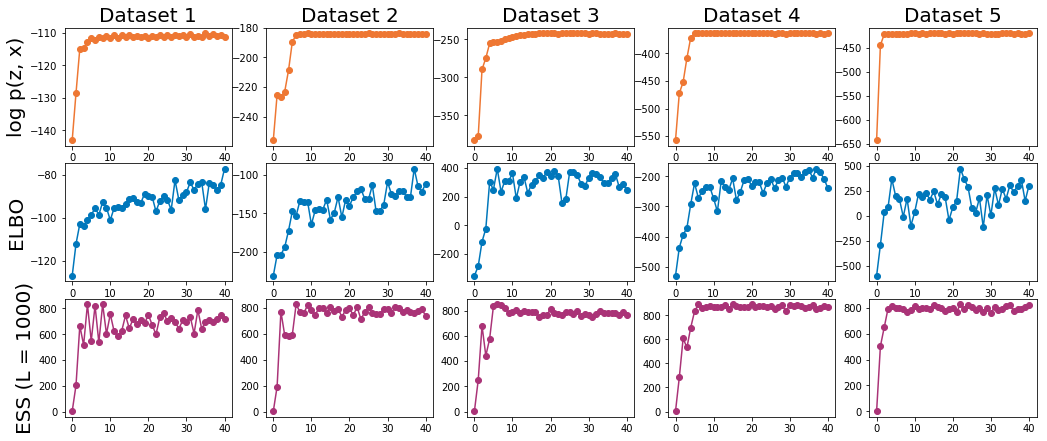

In [6]:
L = 1000
Metrics_converge = evaluator.Test_uniform(APG_test, Data, DATA_PTR, mcmc_steps=40, sample_size=L)
visualizer.Plot_metrics(Metrics_converge['log_joint'], Metrics_converge['elbos'], Metrics_converge['ess'], sample_size=L, filename='gmm-metrics-1')